<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/Transporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Camión de Transporte**


1. La empresa TIBASA (fabricante de tinas de baño) tiene asignado un camión especial para el transporte de tinas terminadas. Dicho camión transporta diariamente 5 tinas.

  Si la capacidad del camión es de una tonelada, ¿cuál es la probabilidad de que el peso de las tinas exceda la capacidad del camión?
  
  (a) Resolver analíticamente.
  
  (b) Resolver por simulación.




##Solución analítica

Sea

f(x) =
\begin{cases}
\frac{1}{400}(x - 190), & \text{si } 190 \leq x \leq 210 \\
\frac{1}{400}(230 - x), & \text{si } 210 < x \leq 230
\end{cases}


Calculamos la media y la varianza de f(x)

$
\mu = E[x] = \int_{190}^{210} x \frac{1}{400}(x - 190) dx + \int_{210}^{230} x \frac{1}{400}(230 - x) dx
$

$
\sigma^2 = Var[x] = E[(x-\mu)^2] = \int_{190}^{210} (x-\mu)^2 \frac{1}{400}(x - 190) dx + \int_{210}^{230} (x-\mu)^2 \frac{1}{400}(230 - x) dx
$

Usando el teorema del límite central tenemos

$
\lim_{n \to \infty} P\left(\frac{\bar{x}_n - \mu}{\sigma/\sqrt{n}} < z\right) = \Phi(z)
$

Entonces

$
z = \frac{1000 - 5(210)}{\sqrt{\frac{200}{3}}} = -2.7386
$

$
P(z < -2.7386) = \phi(-2.7386) = 1 - \phi(2.7386)
$

$
= 1 - 0.0034 = 0.9966
$

La probabilidad de que el peso exceda de la capacidad del camión es de 99.66%

##Solución por simulación

In [47]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

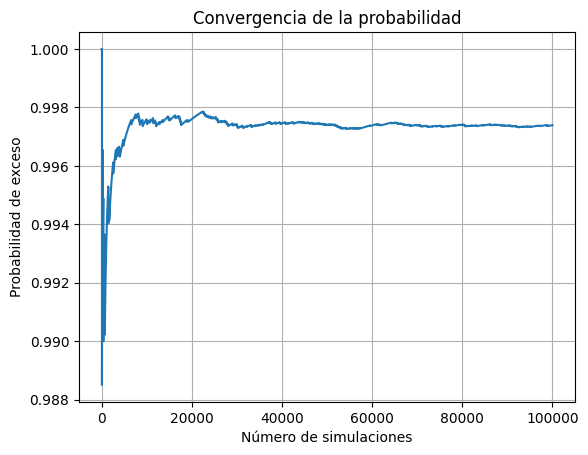

In [52]:
def transporte(N):
  Resultados = []
  contador = 0

  for i in range (N):
    u_i = sum(random.triangular(190, 230, 210) for _ in range(5))

    if u_i > 1000:
      contador += 1

    probabilidad = contador/(i + 1)
    Resultados.append(probabilidad)
  return Resultados

# Gráfico
N = 100000
plt.plot(range(1, N + 1), transporte(N))
plt.xlabel("Número de simulaciones")
plt.ylabel("Probabilidad de exceso")
plt.title("Convergencia de la probabilidad")
plt.grid(True)
plt.show()

2. Analice la conveniencia de adquirir un nuevo camión. Para tal propósito, suponga que cada vez que la capacidad del camión es excedida una tina es enviada a través de otra compañía a un costo de $ 200.

  También suponga que el costo promedio anual de un nuevo camión es de $60, 000. Si se trabaja 5 días a la semana y 52 semanas al año, ¿cuál de las dos alternativas mencionadas es la más atractiva?
  
  (a) Resolver analíticamente.
  
  (b) Resolver por simulación.

##Solución analítica

Sabemos que la cantidad de dias trabajados durante el año es (5 dias * 52 semanas)=260 días

También sabemos que el peso excede un 99.66% de las veces, por lo que para conocer el número de días que es probable que exceda calculamos lo siguiente:

$
\frac{(99.66)(260)}{100}=259
$

Para conocer el costo que genera enviar las tinas por una compañia de transporte hacemos lo siguiente:

$
(259)(200)=51800
$

Por lo que concluimos que esta opción es la más económica.

##Solución por simulación

In [59]:
costo = 200
costo_anual = 60000
dias_laborales = 5
semanas_al_año = 52
probabilidad_exceso = np.mean(transporte(N))

dias_exceso = probabilidad_exceso * (dias_laborales * semanas_al_año)
costo_envio = dias_exceso * costo_por_tina

print("El costo de envío es:", costo_envio)

if costo_envio_tinas < costo_anual_camion:
    print(f"Es más económico enviar las tinas con otra compañía. Costo total: ${costo_envio}")
else:
    print(f"Es más económico adquirir un nuevo camión. Costo anual del camión: ${costo_anual_camion}")

El costo de envío es: 51884.34306993465
Es más económico enviar las tinas con otra compañía. Costo total: $51884.34306993465
